# Paper Code Overview

## Installation 

Cloned with "`git clone https://github.com/MuhammedHasan/metabolitics.git`"

Download dependencies with "`pip install -r requirements.txt`"

This notebook is avaliable at "`src/notebooks/paper_overview.ipynb`"

Run notebook with "`jupyter notebook`" and run all cells results of paper will be reproduced

Note: Some computation step precomputed and loaded due to reduce expensive computation steps but there are still some steps may require relatively high memory and computation power.

## Data Preprocessing

Imports and basic configurations

In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'..'))

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2g}'.format)

Loading pre-computed reaction fluxes since this is expensive computation 

In [3]:
from services import DataReader

X, y = DataReader().read_analyze_solution('bc_averaging_disease_analysis#k=0')

Convertion of reaction level flux informations to pathway level diff scores 

In [4]:
from preprocessing import DynamicPreprocessing

pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])
X_pathways = pre.fit_transform(X, y)

pre = DynamicPreprocessing(['flux-diff', 'feature-selection', 'pathway-scoring', 'transport-elimination'])
X_fs_pathways = pre.fit_transform(X, y)

`"flux-diff"` converts min-max values to diff score based on methods explained in the paper.

`"feature-selection"` feature selection select significant reactions. Thus, it is decrease number of pathway and this version used during in this paper. But unselected-version also provides to show diff-score for all pathways.  

`"pathway-scoring"` converts reaction diff scores into pathway diff scores

`"transport-elimination"` eliminates transport pathway in final dataset.

## Significant Pathways

Elimation of low variance feature for ANOVA since zero variance features cause computatinal problems. And convertion to pandas DataFrame.

In [5]:
from services.data_utils import variance_threshold_on_df

df_pathways = variance_threshold_on_df(pd.DataFrame(X_pathways), threshold=0.1)

df_fs_pathways = pd.DataFrame(X_fs_pathways)

ANOVA computation

In [6]:
from sklearn.feature_selection import f_classif

F, pvals = f_classif(df_pathways.values, y)
F_fs, pvals_fs = f_classif(df_fs_pathways.values, y)

Correction of p-values with multiple hypothesis testing

In [7]:
from statsmodels.sandbox.stats.multicomp import multipletests

_, corrected_pvals, _, _ = multipletests(pvals, alpha=0.1, method='fdr_bh')
_, corrected_pvals_fs, _, _ = multipletests(pvals_fs, alpha=0.1, method='fdr_bh')

P and F values added to DataFrame

In [8]:
df_pathways['labels'] = y
df_fs_pathways['labels'] = y

df_pathways_mean = df_pathways.groupby('labels').mean().T
df_fs_pathways_mean = df_fs_pathways.groupby('labels').mean().T

df_pathways_mean['F'] = F
df_pathways_mean['pval'] = corrected_pvals

df_fs_pathways_mean['F'] = F_fs
df_fs_pathways_mean['pval'] = corrected_pvals_fs

In [9]:
sort_by = 'pval'

In [10]:
df_pathways_mean.sort_values(sort_by, ascending=True).round(5)

labels,bc,h,F,pval
CoA catabolism_dif,3.1e+02,-0,1e+02,0
Taurine and hypotaurine metabolism_dif,5.6e+02,0,92,0
Butanoate metabolism_dif,-2.4e+02,-0,74,0
Methionine and cysteine metabolism_dif,84,0,71,0
Eicosanoid metabolism_dif,-6.7,-0,40,0
Aminosugar metabolism_dif,-56,0,39,0
Arginine and Proline Metabolism_dif,83,0,34,0
Glutamate metabolism_dif,-1.6e+02,0,28,0
Purine synthesis_dif,-2e+02,-0,25,1e-05
Sphingolipid metabolism_dif,-18,-0,25,1e-05


In [11]:
(df_pathways_mean.sort_values(sort_by, ascending=True)
     .applymap(lambda x: '%.1g' % x).to_csv('notebooks/significant_pathways.csv'))

In [12]:
df_fs_pathways_mean.sort_values(sort_by, ascending=True)

labels,bc,h,F,pval
Alanine and aspartate metabolism_dif,1.3e+03,1.5e-13,2e+02,1.7e-31
Arginine and Proline Metabolism_dif,8.5e+02,-4e-14,1.6e+02,1.9e-26
Methionine and cysteine metabolism_dif,1.7e+03,5.7e-14,1.3e+02,2.5e-23
Taurine and hypotaurine metabolism_dif,9.7e+02,-6.9e-14,1.3e+02,1e-22
CoA catabolism_dif,6.1e+02,-1.2e-13,1.2e+02,2.5e-22
Fatty acid oxidation_dif,-1.1e+03,3e-13,1.2e+02,2.4e-21
Nucleotide interconversion_dif,1.3e+03,1.5e-13,1.1e+02,2.7e-20
Eicosanoid metabolism_dif,-7.3e+02,-9.6e-14,80,6.3e-16
Butanoate metabolism_dif,-6.7e+02,-2e-13,69,3.4e-14
Glycolysis/gluconeogenesis_dif,7.7e+02,2.8e-13,68,4.6e-14


## Heatmaps

In [13]:
from visualization import HeatmapVisualization

top_10_pathways = df_fs_pathways_mean.sort_values(sort_by, ascending=True)[:10].index

heat = HeatmapVisualization(list(df_fs_pathways[top_10_pathways].T.to_dict().values()), y).iplot_heatmap()

## Significant Pathways For Stages

Reads stage labels

In [14]:
_, y_stages = DataReader().read_data('BC', True)

Shows stage statistics

1    19
2    50
3    49
4    20
h    76
dtype: int64


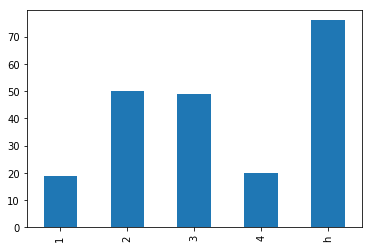

In [15]:
from itertools import groupby

freqs = pd.Series({key:len(list(group)) for key, group in groupby(np.sort(y_stages))}) 

print(freqs)

freqs.plot(kind='bar')

Healthy samples eliminated in stage study

In [16]:
X_pathways_without_h, y_stages_without_h = list(zip(*filter(lambda x: x[1] !='h', zip(X_pathways, y_stages))))

In [17]:
df_pathways_without_h = variance_threshold_on_df(pd.DataFrame.from_records(X_pathways_without_h), threshold=0.1)

ANOVA calculation for different stages

In [18]:
F_stages, pvals_stages = f_classif(df_pathways_without_h.loc[:, df_pathways_without_h.columns != 'labels'].values, y_stages_without_h)

Correction of p-values with multiple hypothesis testing

In [19]:
_, corrected_pvals_stages, _, _ = multipletests(pvals_stages, alpha=0.1, method='fdr_bh')

In [20]:
df_pathways_without_h['labels'] = y_stages_without_h

df_pathways_stage_mean = df_pathways_without_h.groupby('labels').mean().T

df_pathways_stage_mean['F'] = F_stages
df_pathways_stage_mean['pval'] = corrected_pvals_stages

In [21]:
df_pathways_stage_mean.sort_values(sort_by, ascending=True)

labels,1,2,3,4,F,pval
Folate metabolism_dif,15,-18,-14,-3.5,3.6,0.24
Fatty acid synthesis_dif,8.4,-1.5,0.35,16,4.1,0.24
Biotin metabolism_dif,-2.3e+02,80,8.4,-1.1e+02,3.7,0.24
Lysine metabolism_dif,-76,-10,1.1e+02,96,4.2,0.24
"Glycine, serine, alanine and threonine metabolism_dif",4.9,-78,-92,-46,3.3,0.31
Butanoate metabolism_dif,-2e+02,-2.6e+02,-2.6e+02,-2.1e+02,3,0.33
Urea cycle_dif,14,-28,-33,-45,3.1,0.33
beta-Alanine metabolism_dif,-59,-11,24,-52,2.6,0.37
Purine synthesis_dif,-1.1e+02,-2.3e+02,-1.8e+02,-2.6e+02,2.7,0.37
Glycosphingolipid metabolism_dif,1.2,-0.92,-1.2,-1.3,2.7,0.37


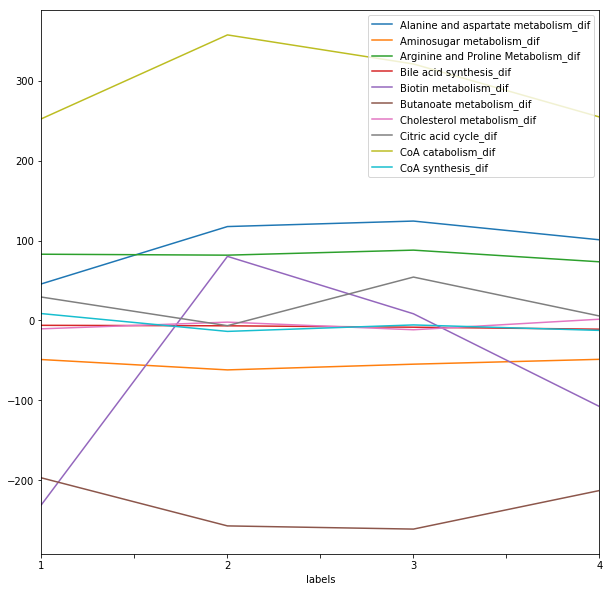

In [22]:
df_pathways_stage_mean[:10][['1','2','3','4']].T.plot(kind='line', figsize=(10, 10))

## Pathifier Results

Loads patifier results which obtain according to our metabolite pathway mapping

In [23]:
from services import DataReader

X_pathifier, y = DataReader().read_analyze_solution('bc_pathifier_analysis#k=0')

Pathway by their pathier scores

In [24]:
pd.DataFrame.from_records(X_pathifier).mean().sort_values(ascending=False)

N-glycan degradation                                 0.87
Keratan sulfate degradation                          0.87
Valine, leucine, and isoleucine metabolism           0.85
Urea cycle                                            0.8
Citric acid cycle                                    0.75
Alanine and aspartate metabolism                      0.7
Vitamin C metabolism                                 0.69
Arginine and Proline Metabolism                      0.62
Lysine metabolism                                     0.6
Glyoxylate and dicarboxylate metabolism              0.59
Methionine and cysteine metabolism                   0.43
Glycerophospholipid metabolism                       0.34
Tryptophan metabolism                                0.31
Tyrosine metabolism                                  0.27
Sphingolipid metabolism                              0.26
Eicosanoid metabolism                                0.23
Miscellaneous                                        0.19
Pentose phosph

## Paradigm Results

## Measured Metabolite Count For Each Pathway

Load metobolite measurements and map naming

In [25]:
from models import metabolite_extantions
from services import NamingService

X_metabolites = NamingService('recon').to(DataReader().read_data('BC')[0])

Network loaded

In [26]:
recon = DataReader().read_network_model()

metabolite names

In [27]:
from functools import reduce

metabolite_names = set(reduce(list.__add__, [list(m.keys()) for m in X_metabolites]))

In [28]:
from collections import defaultdict

pathways = defaultdict(int)
for m in metabolite_names:
    for p in recon.metabolites.get_by_id(m).connected_subsystems():
        if p:
            pathways[p] += 1

pd.Series(pathways)

Alanine and aspartate metabolism                      7
Alkaloid synthesis                                    1
Aminosugar metabolism                                 1
Arachidonic acid metabolism                           1
Arginine and Proline Metabolism                       8
Bile acid synthesis                                   1
Biotin metabolism                                     1
C5-branched dibasic acid metabolism                   1
Cholesterol metabolism                                2
Citric acid cycle                                     5
D-alanine metabolism                                  1
Eicosanoid metabolism                                 4
Exchange/demand reaction                             26
Fatty acid oxidation                                 15
Fructose and mannose metabolism                       2
Galactose metabolism                                  2
Glutamate metabolism                                  1
Glycerophospholipid metabolism                  

## Classification 

Pathway diff-scores given as input to LogisticRegression with given parameters

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('pca', PCA()),
            ('clf', LogisticRegression(C=0.3e-6, random_state=43))
        ])

10-fold test runned with f1 score calculation

In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GroupKFold

kf = StratifiedKFold(n_splits=10, random_state=43)

scores = cross_val_score(pipe, X_fs_pathways, y, cv=kf, n_jobs=-1, scoring='f1_micro')
print('kfold test: %s' % scores)
print('mean: %s' % scores.mean().round(3))
print('std: %s' % scores.std().round(3))

kfold test: [ 0.95454545  0.95454545  0.90909091  1.          0.90909091  0.95454545
  1.          1.          0.85        0.95      ]
mean: 0.948
std: 0.046
